# Climate Change Belief Analysis Project

**Name: Lungisa Joctrey**

## Table of Contents

1. Introduction
2. Importing Packages and Loading Data
3. Exploratory Data Analysis
4. Data Preprocession
5. Modelling
6. Evaluation and Testing
7. App and Model Analysis

### 1. Introduction

The end goal of this research is to look at the tweets from individuals and determine if that particular person believ in the climate change or not. At the end we shall create a model that is able to perfom this task well and deploying using streamlit so that it can be available for everyone to use. 

### 2. Importing Packages and Loading Data

We are now importing our packages so that we can work well with our data

In [272]:
#importing packages
import pandas as pd    #importing pandas 
import numpy as np     #import numpy, not sure if i will need it but we'll see

#importing natural language processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re  #import regular expression
from textblob import TextBlob    #for spelling correction

#importing visualization libraries

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Next, we import our dataset.

In [273]:
#loading training a and testing 
df_train = pd.read_csv('train.csv')  #training dataset is called df_train
df_test = pd.read_csv('test.csv')   #test dataset is called df_test

Below, we show the 5 first lines of our training dataset

In [274]:
df_train.head(20)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


In [275]:
df_train.tail(20)

,sentiment,message,tweetid
15799,1,RT @SethMacFarlane: HRC proposes installing ha...,52528
15800,1,RT @sapinker: The only practical way to avert ...,580806
15801,1,RT @SenSanders: On virtually every major issue...,331127
15802,2,Michael Bloomberg to world leaders: ignore Tru...,585908
15803,2,"Suicides of nearly 60,000 Indian farmers linke...",296403
15804,1,RT @cathdweeb: me with full knowledge of globa...,386076
15805,2,RT @GrindTV: New head of EPA says climate chan...,830383
15806,-1,RT @HerberMp: @sness5561_ness Al Gore is a idi...,213863
15807,1,#scottpruit climate change comments would be l...,447067
15808,0,RT @ThePowersThatBe: Now if she could only be ...,127777


Our training Data has containg the 3 features, namely:
- __Sentiment__ (dependent variable)
- __Message__
- __TweetId__

The sentiment feature is our dependent variable. This is the feature our model wil have to predict when we show  it our test data. The message and TweetId are both our predictor variables.

Definition of classes and values in the features. 

The __Sentiment__ feature have these values:
- 2 News:  the tweet links to factual news about climate change
- 1 Pro:  the tweet supports the belief of man-made climate change
- 0 Neutral:  the tweet neither supports nor refutes the belief of man-made climate change
- -1 Anti:  the tweet does not believe in man-made climate change

Class definion source: https://www.kaggle.com/competitions/edsa-climate-change-belief-analysis-2022/data

Below, we show the 5 first lines of our test dataset

In [276]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


The test data contains two features, which are:
- Message
- TweetId

This makes sense because we want our model to look at this data and the predict the sentiment of the Tweet's author on Climate Change.

### 3. Exploratory Data Analysis

In this section, we shall do an indepth analysis of our data, so we can understand how it looks like and to see if it has any discrepancies. We well determine what elements of our data needs removing or adjusting so that the model will make better use of our data. 

The changes that will be done on our training datasetwill also be applied on our test dataset in the Data preprocessing section.

#### 3.1 Shape and Information

Let us look at the shape of df_train and df_test

In [277]:
df_train.shape

(15819, 3)

In [278]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [279]:
df_test.shape

(10546, 2)

In [280]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


Let us check if out dataset have any null values

In [281]:
df_train.isna().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Great out dataset does not have any missing or null values

#### 3.2 Clean the Data

The model we want to fit will not work well with uncleaned text. It is therefore necessary to remove all forms of characters, twitter handles, hashtag symbols, ReTweet symbols and other elements that are not useful for the end goal of this project, hyperlink and email address.

In [323]:
#Let us remove everything that starts with '@mentions' , 'RT', 'hastags'
def clean_tweet(text):
    text = re.sub(r'@[A-Za-z0-9\']+','', text)       #removes twitter handles
    text = re.sub(r'#', '', text)                  #removes "#" symbol
    text = re.sub(r'RT[:\s]+', '', text)           #removes RT and the whitespace after it
    text = re.sub(r'https?:\/\/\S+', '', text)     #removes hyper link
    text = re.sub(r':', '', text)                  #removes ':'
    text = re.sub(r'[Ã¢â‚¬â€_]', '', text)        #removes these characters Ã¢â‚¬â€
    text = re.sub(r'[~!.\?\,\*\']', '', text)
    
    return text

In [324]:
#Applying the clean_tweet function
df_train['clean_message'] = df_train['message'].apply(clean_tweet)  #adding a 'clean_meassage' column to compare with the uncleaned 

#displaying our cleaned text
df_train.tail(20)


,sentiment,message,tweetid,clean_message
15799,1,RT @SethMacFarlane: HRC proposes installing ha...,52528,HRC proposes installing half a billion solar p...
15800,1,RT @sapinker: The only practical way to avert ...,580806,The only practical way to avert climate change...
15801,1,RT @SenSanders: On virtually every major issue...,331127,On virtually every major issue raising the mi...
15802,2,Michael Bloomberg to world leaders: ignore Tru...,585908,Michael Bloomberg to world leaders ignore Trum...
15803,2,"Suicides of nearly 60,000 Indian farmers linke...",296403,Suicides of nearly 60000 Indian farmers linked...
15804,1,RT @cathdweeb: me with full knowledge of globa...,386076,me with full knowledge of global warming
15805,2,RT @GrindTV: New head of EPA says climate chan...,830383,New head of EPA says climate change not caused...
15806,-1,RT @HerberMp: @sness5561_ness Al Gore is a idi...,213863,ness Al Gore is a idiot He thinks climate chan...
15807,1,#scottpruit climate change comments would be l...,447067,scottpruit climate change comments would be li...
15808,0,RT @ThePowersThatBe: Now if she could only be ...,127777,Now if she could only be convinced that hyperb...


Next we need to turn cleaned column text into lowercase, we shall use __REGEX__ again

In [346]:
#changing all upper case into lowercase
def changecase(text):
    text = re.sub(r'[A-Z]', text.lower(), text)
    return text


df_train['clean_message'] = df_train['clean_message'].apply(changecase)
df_train

,sentiment,message,tweetid,clean_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...
2,2,RT @RawStory: Researchers say we have three ye...,698562,researchers say we have three years to act on ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,todayinmaker wired 2016 was a pivotal year in...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,its 2016 and a racist sexist climate change de...
...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,they took down the material on global warming ...
15815,2,RT @washingtonpost: How climate change could b...,17856,how climate change could be breaking up a 200-...
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,notiven nytimesworld notiven nytimesworld what...
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,hey liberals the climate change crap is a hoax...


#### 3.3 Stop Words

I We are no removing stopwrd from our text

In [349]:
#We will now remove the stopwords
stop_words = stopwords.words('english')
df_train['clean_message'] = df_train['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_train

,sentiment,message,tweetid,clean_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warmin...
2,2,RT @RawStory: Researchers say we have three ye...,698562,researchers say three years act climate change...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,todayinmaker wired 2016 pivotal year war clima...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,2016 racist sexist climate change denying bigo...
...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,took material global warming lgbt rights healt...
15815,2,RT @washingtonpost: How climate change could b...,17856,climate change could breaking 200-million-year...
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,notiven nytimesworld notiven nytimesworld trum...
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,hey liberals climate change crap hoax ties age...


#### 3.4 Word Cloud

We are now going to create a wordcloud to see words that are used more often in our dataset. Our focus will be on the message feature. We are going to select the message feature and create a wordcloud from the text in it.

#### 3.4.1 Word Cloud for all text

We are going to do the word cloud for all the text in the clean_message column

In [350]:
#word cloud plot

allwords = ''.join( [twts for twts in df_train['clean_message']])
wcld = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 120, background_color = 'white').generate(allwords)               

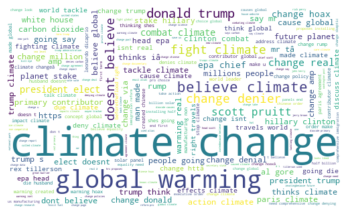

In [352]:
plt.imshow(wcld, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 3.4.2 Word Cloud by Individual Sentiment Class

Let us make a word cloud from the tweets that have a positive, negative, and neutral sentiment.
We shall: 
- Group the features by sentiment 
- Get the words from the tweets that correspond to positive sentiment
- Great word could for all these groups

In [353]:
#groupy feature by sentiment 

grouping = df_train.groupby('sentiment')
grouping.first()

#getting single groups for positive, neutral and negative sentiment

positive = grouping.get_group(1)     #positive sentiment goup
neutral = grouping.get_group(0)      #neutral sentiment group
negative = grouping.get_group(-1)    #negative sentiment group

#### Positive Word Cloud

Below we make a word cloud from words in the positive sentiment group

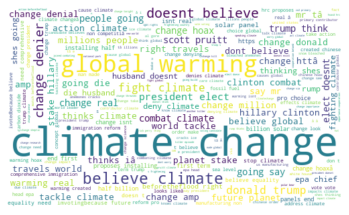

In [354]:
#Positive Word Cloud
poswords = ''.join( [twts for twts in positive.clean_message])
positivewc = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 120, background_color = 'white').generate(poswords) 

plt.imshow(positivewc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Negative Word Cloud

Below we make a word cloud from words in the negative sentiment group.

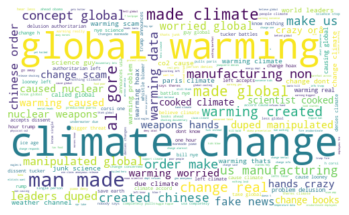

In [355]:
#Negative sentiment word cloud

negwords = ''.join( [twts for twts in negative.clean_message])

negativewc = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 120, background_color = 'white').generate(negwords) 

plt.imshow(negativewc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Neutral  Word Cloud

Below we make a word cloud from words in the neutral sentiment group

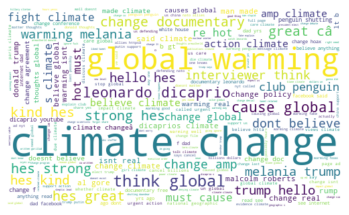

In [356]:
#Neutral sentiment word cloud

neutwords = ''.join( [twts for twts in neutral.clean_message])
neutralwc = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 120, background_color = 'white').generate(neutwords) 

plt.imshow(neutralwc, interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud images above have "climate change" as the highest phrase in the dataset,  and second most used word is "global warming."

#### 3.5 Distribution

We turn our attention to the Sentiment and the TweetId features

In [357]:
plt.bar()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

### 4. Data Preprocession

### 5. Modelling

### 6. Evaluation and Testing 

### 7. App and Model Analysis